In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('04. nasa93.csv')
df.head()

,recordnumber,projectname,cat2,forg,center,year,mode,rely,data,cplx,...,acap,aexp,pcap,vexp,lexp,modp,tool,sced,equivphyskloc,act_effort
0,1,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,25.9,117.6
1,2,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,24.6,117.6
2,3,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,7.7,31.2
3,4,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,8.2,36.0
4,5,de,avionicsmonitoring,g,2,1979,semidetached,h,l,h,...,n,n,n,n,h,h,n,l,9.7,25.2


In [3]:
df.shape

(93, 24)

In [4]:
df.describe()

,recordnumber,center,year,equivphyskloc,act_effort
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,47.752688,3.279570,1980.827957,94.022043,624.411828
std,28.229901,1.683459,3.335004,133.597947,1135.928065
min,1.000000,1.000000,1971.000000,0.900000,8.400000
25%,24.000000,2.000000,1979.000000,15.400000,70.000000
50%,47.000000,2.000000,1980.000000,47.500000,252.000000
75%,70.000000,5.000000,1983.000000,111.000000,600.000000
max,101.000000,6.000000,1987.000000,980.000000,8211.000000


In [5]:
for i in df.columns:
    print(type(df[i]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [6]:
df.isna().sum()

recordnumber     0
projectname      0
cat2             0
forg             0
center           0
year             0
mode             0
rely             0
data             0
cplx             0
time             0
stor             0
virt             0
turn             0
acap             0
aexp             0
pcap             0
vexp             0
lexp             0
modp             0
tool             0
sced             0
equivphyskloc    0
act_effort       0
dtype: int64

<AxesSubplot:>

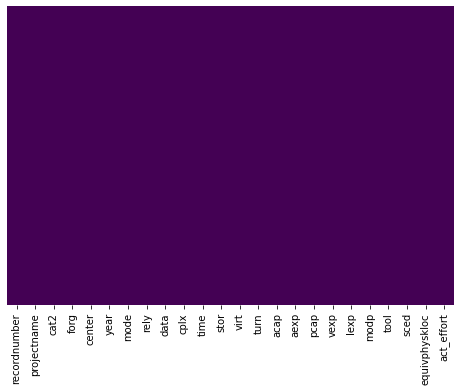

In [34]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #Checking how many missing values are there in it

In [36]:
df.corr()

,recordnumber,center,year,equivphyskloc,act_effort
recordnumber,1.000000,0.639594,-0.323380,0.222124,0.394758
center,0.639594,1.000000,-0.485029,0.505346,0.421006
year,-0.323380,-0.485029,1.000000,-0.471486,-0.354663
equivphyskloc,0.222124,0.505346,-0.471486,1.000000,0.594941
act_effort,0.394758,0.421006,-0.354663,0.594941,1.000000


In [7]:
corr= df.corr(method='pearson') #for normal data
corr.drop('act_effort',inplace=True)

In [8]:
corr.style.background_gradient(cmap='coolwarm')

,recordnumber,center,year,equivphyskloc,act_effort
recordnumber,1.000000,0.639594,-0.323380,0.222124,0.394758
center,0.639594,1.000000,-0.485029,0.505346,0.421006
year,-0.323380,-0.485029,1.000000,-0.471486,-0.354663
equivphyskloc,0.222124,0.505346,-0.471486,1.000000,0.594941


In [9]:
X=df.drop('act_effort', axis=1)
y=df['act_effort']

In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.5)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [11]:
features=[]
for i in corr_features:
    features.append(i)
features

['act_effort', 'equivphyskloc', 'center']

In [12]:
X=df[features]
y=df['act_effort']

# Split train/test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
X.shape

(93, 3)

In [15]:
X.drop("act_effort",axis=1, inplace=True)

G:\ANACONDA installation\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
X.shape

(93, 2)

# LinearRegression

    Actual  LR Predicted
40  1248.0        1248.0
22   120.0         120.0
55  1181.0        1181.0
72   300.0         300.0
0    117.6         117.6
26    70.0          70.0
39   114.0         114.0
67   192.0         192.0
10    24.0          24.0
44   400.0         400.0
83   430.0         430.0
35    42.0          42.0
90   480.0         480.0
62   162.0         162.0
12    36.0          36.0
4     25.2          25.2
18    48.0          48.0
28    82.0          82.0
49   571.4         571.4


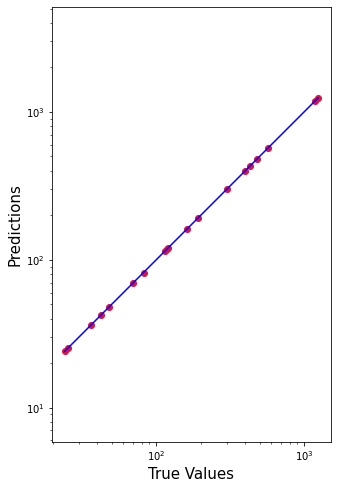

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr_model=LinearRegression()
lr_model.fit(X_train,y_train) #training algorithm

#it’s time to make some predictions.
#we will use our test data and see how accurately our algorithm predicts the percentage score.
predicted_value=lr_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'LR Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Gradient Boosting

    Actual  GB Predicted
40  1248.0   1201.977102
22   120.0    116.796650
55  1181.0   1201.977102
72   300.0    300.670664
0    117.6    116.796650
26    70.0     71.534806
39   114.0    116.233314
67   192.0    191.862756
10    24.0     18.203486
44   400.0    411.627962
83   430.0    432.552452
35    42.0     42.114525
90   480.0    483.342886
62   162.0    159.289892
12    36.0     36.149379
4     25.2     31.463337
18    48.0     48.166631
28    82.0     88.169674
49   571.4    576.441710


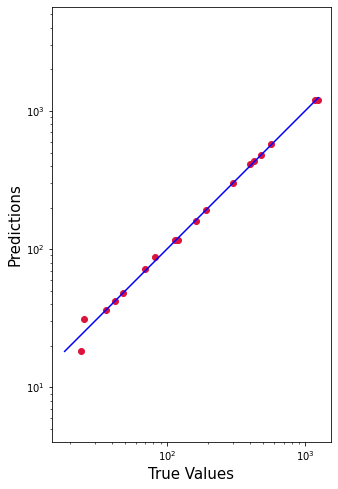

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)
predicted_value=gb_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'GB Predicted':predicted_value})
print(comparison)

plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest

    Actual  RF Predicted
40  1248.0      1264.425
22   120.0       113.090
55  1181.0      1260.015
72   300.0       297.320
0    117.6       112.136
26    70.0        71.260
39   114.0       108.064
67   192.0       209.320
10    24.0        20.220
44   400.0       413.006
83   430.0       433.856
35    42.0        37.732
90   480.0       462.698
62   162.0       175.004
12    36.0        39.112
4     25.2        33.140
18    48.0        50.000
28    82.0        84.330
49   571.4       595.940


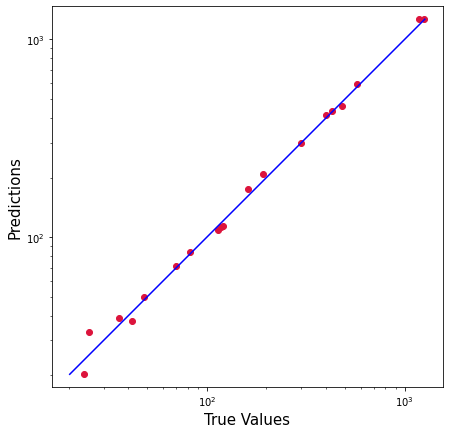

In [19]:
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=43)      
rf_model = rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

predicted_value=rf_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'RF Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Decision Tree Regression

    Actual  DT Predicted
40  1248.0        1350.0
22   120.0         117.6
55  1181.0        1350.0
72   300.0         300.0
0    117.6         117.6
26    70.0          72.0
39   114.0         107.0
67   192.0         192.0
10    24.0          18.0
44   400.0         409.0
83   430.0         432.0
35    42.0          42.0
90   480.0         480.0
62   162.0         150.0
12    36.0          36.0
4     25.2          31.2
18    48.0          48.0
28    82.0          90.0
49   571.4         600.0


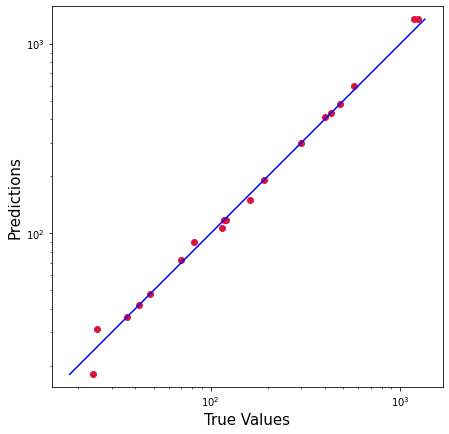

In [20]:
from sklearn.tree import DecisionTreeRegressor
D_model=DecisionTreeRegressor(max_depth=12)
D_model.fit(X_train,y_train)
D_model.score(X_test,y_test)
predicted_value=D_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'DT Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Plotting

In [21]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)


Score=pd.DataFrame({'Linear Regression ':[lr_score],'Gradient Boosting':[gb_score],'Random Forest':[rf_score],'Decision Tree':[d_score]})
Score

,Linear Regression,Gradient Boosting,Random Forest,Decision Tree
0,1.0,0.998798,0.996526,0.983181


In [22]:
names=[]

for i in Score.columns:
    names.append(i)

<BarContainer object of 4 artists>

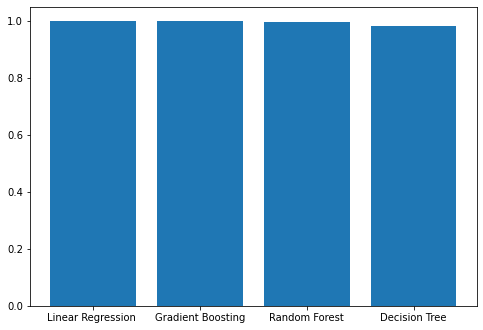

In [23]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.bar(names,Score.iloc[0].values)

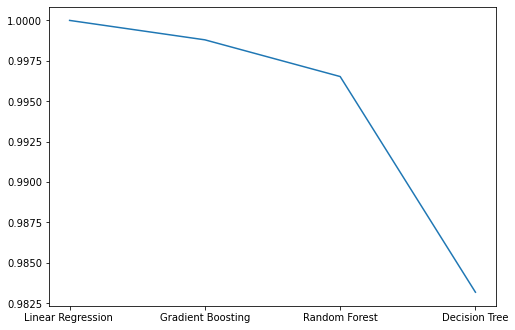

In [24]:
plt.plot(names,Score.iloc[0].values)

# R2

In [25]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)

In [26]:
lr_pred=lr_model.predict(X_test)
gb_pred=gb_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
d_pred=D_model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [28]:
lr_r2_score=r2_score(y_test, lr_pred)
gb_r2_score=r2_score(y_test,gb_pred)
rf_r2_score=r2_score(y_test,rf_pred)
d_r2_score=r2_score(y_test,d_pred)

In [29]:
r2_Score=pd.DataFrame({'Linear Regression ':[lr_r2_score],'Gradient Boosting Tree':[gb_r2_score],'Random Forest':[rf_r2_score],'Decision Tree':[d_r2_score]})
r2_Score

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,1.0,0.998798,0.996526,0.983181


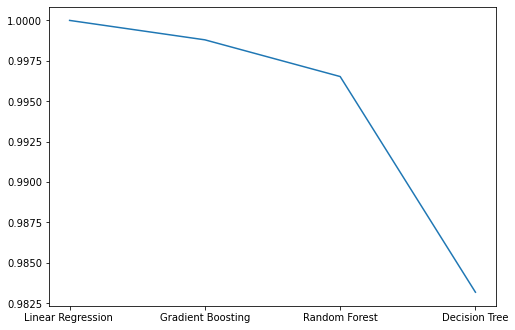

In [30]:
plt.plot(names,r2_Score.iloc[0].values)

# RMSE (Root Mean Square Error)

In [31]:
lr_rmse=np.sqrt(mean_squared_error(lr_pred, y_test))
gb_rmse=np.sqrt(mean_squared_error(gb_pred, y_test))
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
d_rmse=np.sqrt(mean_squared_error(d_pred, y_test))

In [32]:
rmse=pd.DataFrame({'Linear Regression ':[lr_rmse],'Gradient Boosting Tree':[gb_rmse],'Random Forest':[rf_rmse],'Decision Tree':[d_rmse]})
rmse

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,6.520387e-15,12.297806,20.905934,46.001556


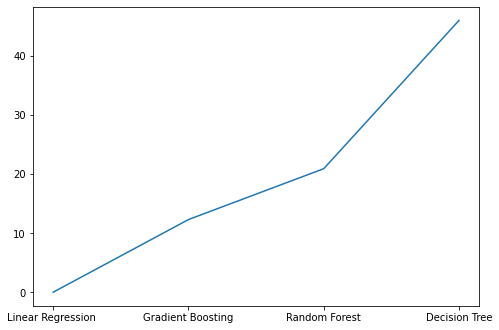

In [33]:
plt.plot(names,rmse.iloc[0].values)